In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
# Here we will read the dataset

In [11]:
df=pd.read_excel("bank.xlsx")

In [12]:
# Here we will check if there is any null value in th rows

In [13]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [14]:
# Here we will take Credit Card as a target label 

In [15]:
# And in Features we will drop CreditCard as it is target label ,

# And ID , ZIP CODE as in description it was given that they will not have any impact in the dataset

In [16]:
x=df.drop(columns=(['ZIP Code','ID','CreditCard']))
y=df.CreditCard

In [ ]:
# Here we have trained the model with features and lables
# With X as features 
# and Y as lables

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [18]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

C:\Users\deadl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_pred = classifier.predict(x_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [47]:
# Confusion Matrix 

In [48]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[867   9]
 [310  64]]


In [35]:
# Classifiction Report

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.84       876
           1       0.88      0.17      0.29       374

    accuracy                           0.74      1250
   macro avg       0.81      0.58      0.57      1250
weighted avg       0.78      0.74      0.68      1250



In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [50]:
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [51]:
# Accuracy Score 

In [52]:
accuracy_score(y_test, y_pred)

0.7448

C:\Users\deadl\AppData\Local\Temp\ipykernel_9488\481506267.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\deadl\AppData\Local\Temp\ipykernel_9488\481506267.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


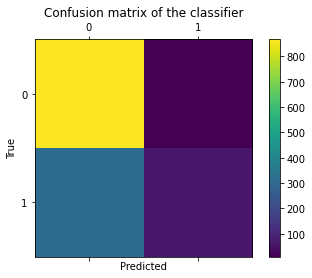

In [53]:
labels=[0,1]
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [28]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score,RepeatedKFold

In [40]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.742 (0.016)


In [41]:
def get_score(model,x_train, x_test, y_train, y_test):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    return accuracy_score(y_test,y_pred)

In [42]:
get_score(classifier,x_train, x_test, y_train, y_test)

0.7448

In [43]:
from sklearn.model_selection import cross_val_score

In [46]:
classifier.score(x_test,y_test)

0.7448